## 1. SETUP AND LOAD DATA

1.1 Install Dependencies and Import Libraries

In [2]:
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip list

Package                      Version
---------------------------- ----------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.46.0
gast                         0.5.4
google-auth                  2.25.2
google-auth-oauthlib         1.1.0
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.10.0
idna                         3.6
ipykernel                    6.27.1
ipython                      8.18.1
jedi                         0.19.1
jupyter_client               8.6.0



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
import os
import cv2

In [2]:
# Checking CPU
cpus = tf.config.experimental.list_physical_devices('CPU')

In [3]:
len(cpus)

1

In [4]:
# Checking GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

1.2 Remove Dodgy Images

In [6]:
data_dir = './ImageClassification/data'

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
base_path = os.path.join(os.getcwd(), 'data')

happy_path = os.path.join(base_path, 'happy')
sad_path = os.path.join(base_path, 'sad')

In [9]:
# Remove image that has different extensions
for image_class in os.listdir(base_path):
    for image in os.listdir(os.path.join(base_path, image_class)):
        image_path = os.path.join(base_path, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))

Issue with imageD:\ImageClassification\data\happy\05-12-21-happy-people.jpg
Issue with imageD:\ImageClassification\data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with imageD:\ImageClassification\data\happy\1-2.jpg
Issue with imageD:\ImageClassification\data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with imageD:\ImageClassification\data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with imageD:\ImageClassification\data\happy\154006829.jpg
Issue with imageD:\ImageClassification\data\happy\170404-happy-workers-feature.jpg
Issue with imageD:\ImageClassification\data\happy\1902539.jpg
Issue with imageD:\ImageClassification\data\happy\1902540.jpg
Issue with imageD:\ImageClassification\data\happy\1902587.jpg
Issue with imageD:\ImageClassification\data\happy\1920px-face-smile.svg_.png.jpg
Issue with imageD:\ImageClassification\data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with imageD:\ImageClassification\data\happy\227-2271622_happy-people-business-team

1.3 Checking image file

In [10]:
img = cv2.imread(os.path.join('data', 'happy', '154006829.jpg'))

In [11]:
img.shape

(3744, 5616, 3)

In [12]:
from matplotlib import pyplot as plt

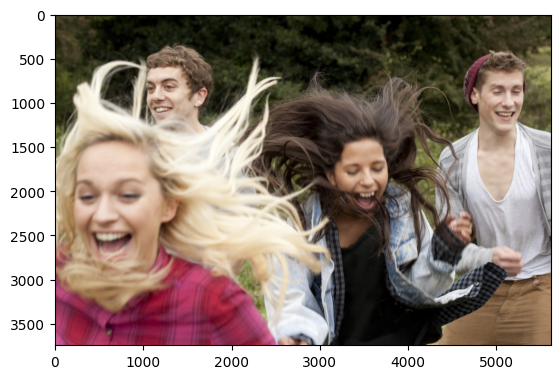

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

1.4 Load Data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 171 files belonging to 2 classes.


In [16]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
data_iterator

In [19]:
# Get another batch from the iterator
batch = data_iterator.next()

In [20]:
# Images represented as numpy arrays
# Class 1 = Sad People
# Class 0 = Happy People
# len(batch)
batch[1]
# batch[0].shape

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

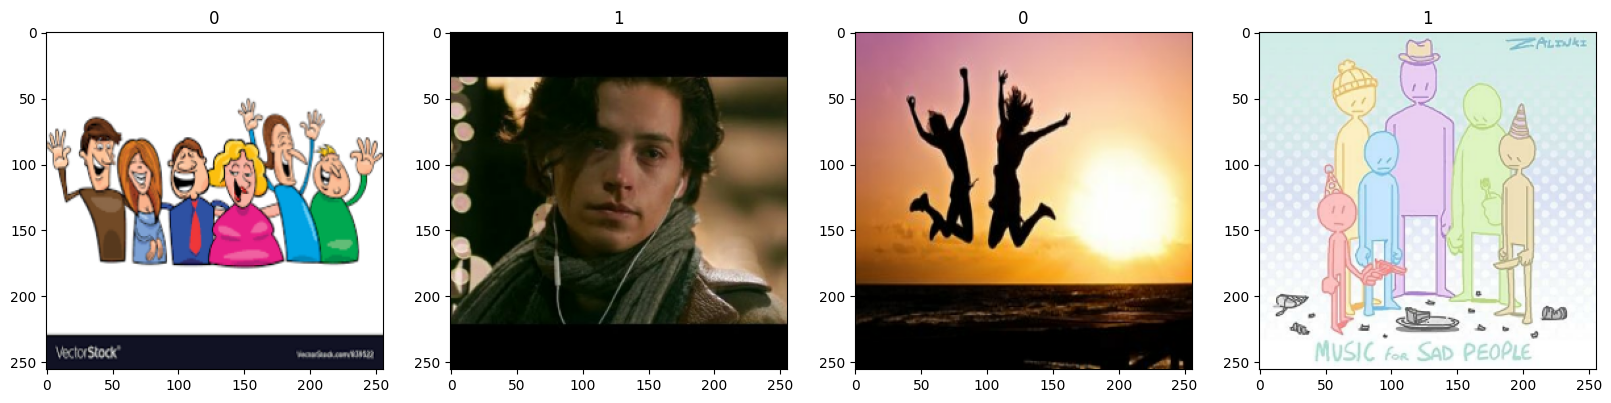

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
scaled = batch[0] / 255

In [23]:
scaled.max()

1.0

## 2. Preprocess Data

2.1 Scale Data

In [24]:
data = data.map(lambda x,y: (x/255, y))

In [25]:
scaled_iterator = data.as_numpy_iterator()

In [26]:
batch = scaled_iterator.next()

In [27]:
batch[0].max()

1.0

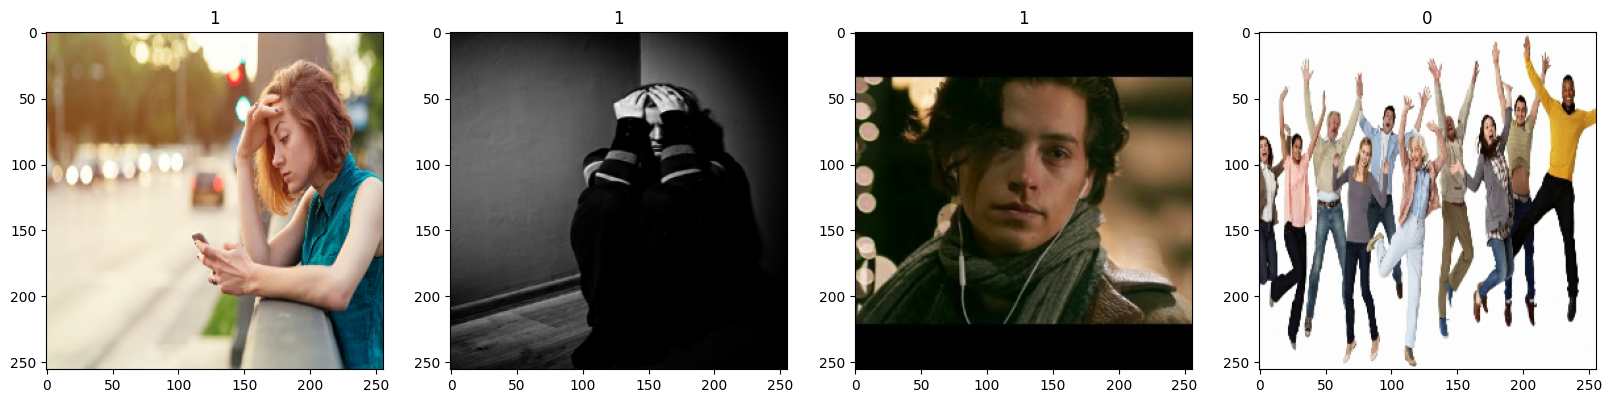

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) #convert to int becomes all 0 values (all black)
    ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [29]:
len(data)

6

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [31]:
train_size + val_size + test_size

6

In [32]:
#shuffle the data before running this
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [33]:
len(test)

1

## 3. Deep Learning Model

3.1 Building the Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

3.2 Train

In [39]:
logdir = 'logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


4/4 [==============================] - 4s 571ms/step - loss: 1.2925 - accuracy: 0.5156 - val_loss: 0.6693 - val_accuracy: 0.5625
Epoch 2/20
4/4 [==============================] - 3s 516ms/step - loss: 0.6464 - accuracy: 0.6328 - val_loss: 0.6675 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 3s 514ms/step - loss: 0.6352 - accuracy: 0.6406 - val_loss: 0.5257 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 3s 518ms/step - loss: 0.5710 - accuracy: 0.6484 - val_loss: 0.6996 - val_accuracy: 0.5625
Epoch 5/20
4/4 [==============================] - 3s 512ms/step - loss: 0.6714 - accuracy: 0.6016 - val_loss: 0.4638 - val_accuracy: 0.7188
Epoch 6/20
4/4 [==============================] - 3s 513ms/step - loss: 0.5002 - accuracy: 0.7891 - val_loss: 0.5113 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 3s 508ms/step - loss: 0.5144 - accuracy: 0.7656 - val_loss: 0.4896 - val_accuracy: 0.7188
Epoch 8/20
4/4 [==

In [42]:
hist.history

{'loss': [1.2924540042877197,
  0.646448016166687,
  0.6352113485336304,
  0.5709570646286011,
  0.6713703274726868,
  0.500174880027771,
  0.5144136548042297,
  0.4242149889469147,
  0.3799595534801483,
  0.387686550617218,
  0.2858361303806305,
  0.2189401388168335,
  0.19077205657958984,
  0.11003472656011581,
  0.1431671679019928,
  0.1487446129322052,
  0.09025347977876663,
  0.06408562511205673,
  0.05630626529455185,
  0.037090495228767395],
 'accuracy': [0.515625,
  0.6328125,
  0.640625,
  0.6484375,
  0.6015625,
  0.7890625,
  0.765625,
  0.8515625,
  0.828125,
  0.8203125,
  0.8828125,
  0.9296875,
  0.96875,
  0.9765625,
  0.9375,
  0.953125,
  0.9921875,
  0.9921875,
  0.984375,
  0.9921875],
 'val_loss': [0.6692857146263123,
  0.6675331592559814,
  0.525672197341919,
  0.699569582939148,
  0.4638303518295288,
  0.5112994909286499,
  0.48958566784858704,
  0.4326964020729065,
  0.24596263468265533,
  0.21367934346199036,
  0.1881687194108963,
  0.20996291935443878,
  0.162

3.3 Plot Performance

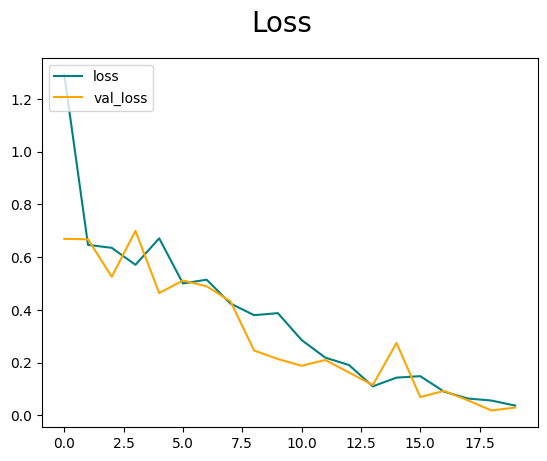

In [43]:
#if loss goes down but validation loss steadily goes up it might be an indication of overfitting, try regularization or change some data
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
#if loss doesnt go down, try fixing the training data and neural network. because that means it was not able to learn the data. bias problem

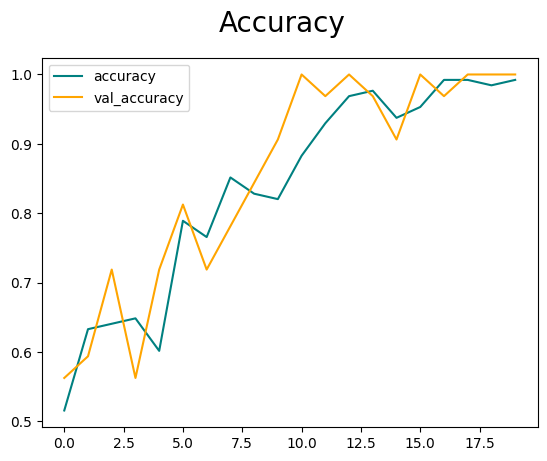

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 4. Evaluate Performance

4.1 Evaluate

In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
len(test)

1

In [48]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 99ms/step


In [49]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


4.2 Test

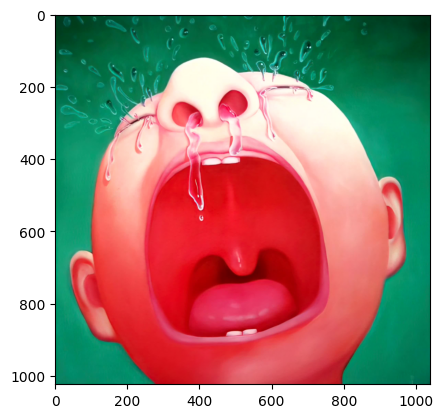

In [57]:
img = cv2.imread('sadtest2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

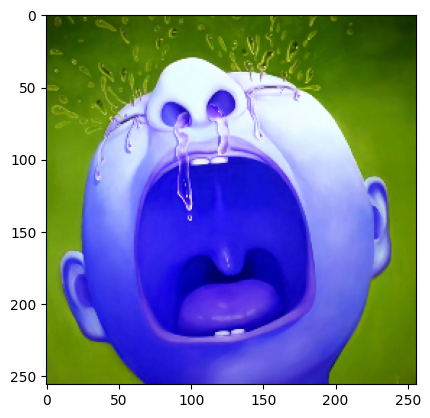

In [58]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
resize.shape

TensorShape([256, 256, 3])

In [60]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [61]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 22ms/step


In [62]:
yhat

array([[0.985539]], dtype=float32)

In [63]:
if yhat > 0.5:
    print(f"Predicted class is Sad")
else:
    print(f"Predicted class is Happy")

Predicted class is Sad


## 5. Save Model

5.1 Save the Model

In [79]:
from tensorflow.keras.models import load_model

In [80]:
model.save(os.path.join('models', 'DeepCNNImageClassifier.h5'))

In [81]:
os.path.join('models', 'DeepCNNImageClassifier.h5')

'models\\DeepCNNImageClassifier.h5'

In [82]:
new_model = load_model(os.path.join('models', 'DeepCNNImageClassifier.h5'))

In [83]:
new_model

In [84]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 65ms/step


In [85]:
if yhatnew > 0.5:
    print(f"Predicted class is Sad")
else:
    print(f"Predicted class is Happy")

Predicted class is Sad
